# [실습] lec03.머신러닝_전처리 : 범주형(categorical) 변수 image.png

In [1]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

<font size=6><b> lec03.머신러닝_전처리 : 범주형(categorical) 변수
![image.png](attachment:e5dba615-94df-4aed-b8de-498585dd0415.png)

### 범주형 변수 categorical data 처리
* 라벨인코딩(Label Encoding)
* 원핫인코딩(One-hot Encoding)
* 범주화(Bining)

> <font size=4><b>(1) 라벨인코딩(Label Encoding)
> * n개의 범주형 데이터를 0부터 n-1까지의 연속적 수치 데이터로 표현

In [2]:
# df['le'] = res
# df.head(3)

In [3]:
# le.classes_

In [4]:
df=pd.read_csv("../comp/titanic/train.csv")[["Pclass","Age","Embarked"]][:10]
df.columns = df.columns.str.lower()
df

,pclass,age,embarked
0,3,22.0,S
1,1,38.0,C
2,3,26.0,S
3,1,35.0,S
4,3,35.0,S
5,3,NaN,Q
6,1,54.0,S
7,3,2.0,S
8,3,27.0,S
9,2,14.0,C


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
data=df['embarked']
le= LabelEncoder()
le.fit(data) # a
res=le.transform(data)
res

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0])

In [7]:
le.inverse_transform([0,1,2])

array(['C', 'Q', 'S'], dtype=object)

> <font size=4><b>(2) 원핫인코딩(One-hot Encoding)
> * 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 벡터 표현 방식
> *  데이터프레임에서 object 타입으로 되어있는 변수는 dummy 변수화
> * <font color=red><b> 판다스의 시리즈가 아닌 numpy 행렬을 입력해야함 → df['컬럼'].values
> * <font color=red><b> 벡터 입력을 허용하지 않음 → reshape(-1,1)을 이용해 Matrix로 변환  (N,) → (N,1)

In [8]:
data = df['embarked']
print(data.shape)

# np.array(data)
# data.to_numpy()
print(data.values.reshape(-1,1).shape) # --- (10,1)
data = data.values.reshape(-1,1)
# data.reshape(-1,1)
data

(10,)
(10, 1)


array([['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C']], dtype=object)

In [9]:
oh = OneHotEncoder(sparse=False, dtype=np.int64)
oh.fit(data) # array - like of shape
res = oh.transform(data)
print(res)

[[0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]]


In [10]:
df[["a","b","c"]] = res
df.head(3)

,pclass,age,embarked,a,b,c
0,3,22.0,S,0,0,1
1,1,38.0,C,1,0,0
2,3,26.0,S,0,0,1



> <font size=3><b>(3) get_dummies() = 라벨인코딩(Label Encoding)+원핫인코딩(One-hot Encoding)+ 결측처리
> * 그러니까 결측처리를 원하는대로 먼저하고 get_dummies()를 써야함


In [11]:
res= pd.get_dummies(df['embarked'])
res

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
5,False,True,False
6,False,False,True
7,False,False,True
8,False,False,True
9,True,False,False


In [12]:
pd.get_dummies(df['embarked'],prefix='dummi',dtype=int) #기본 데이터 값이 불리언

,dummi_C,dummi_Q,dummi_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [13]:
dd=pd.concat([df,res],axis = 1) 
dd

,pclass,age,embarked,a,b,c,C,Q,S
0,3,22.0,S,0,0,1,False,False,True
1,1,38.0,C,1,0,0,True,False,False
2,3,26.0,S,0,0,1,False,False,True
3,1,35.0,S,0,0,1,False,False,True
4,3,35.0,S,0,0,1,False,False,True
5,3,NaN,Q,0,1,0,False,True,False
6,1,54.0,S,0,0,1,False,False,True
7,3,2.0,S,0,0,1,False,False,True
8,3,27.0,S,0,0,1,False,False,True
9,2,14.0,C,1,0,0,True,False,False


* 여러컬럼 한번에 변환

In [14]:
df=pd.read_csv("../comp/titanic/train.csv")[["Pclass","Age","Embarked","Sex"]][:10]
df.columns = df.columns.str.lower()
df

,pclass,age,embarked,sex
0,3,22.0,S,male
1,1,38.0,C,female
2,3,26.0,S,female
3,1,35.0,S,female
4,3,35.0,S,male
5,3,NaN,Q,male
6,1,54.0,S,male
7,3,2.0,S,male
8,3,27.0,S,female
9,2,14.0,C,female


In [15]:
df= pd.get_dummies(df)
df.head()

,pclass,age,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,3,22.0,False,False,True,False,True
1,1,38.0,True,False,False,True,False
2,3,26.0,False,False,True,True,False
3,1,35.0,False,False,True,True,False
4,3,35.0,False,False,True,False,True


<Axes: >

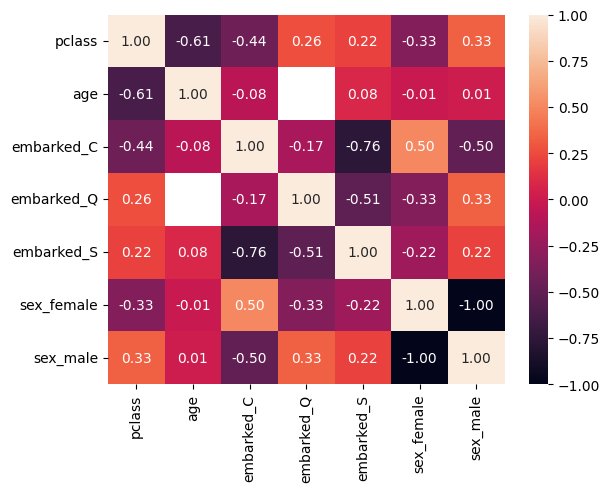

In [16]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")

In [17]:
# 통으로 볼 때는 연관성이 안보였는데, 겟더미로 나누어 보았을때 의미있는 패턴을 발견할 수 있음

# 스케일링(Scaling)
* 데이터의 값이 너무 크거나 작아 변수의 영향이 제대로 반영되지 않을 경우, 알고리즘의 계산 과정에서 0으로 수렴하거나 값이 너무 커져버리는 경우 값의 
* StandardScaler()
* MinMaxScaler()
* RobustScaler()

In [18]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler


In [19]:
mm= MinMaxScaler
ss=StandardScaler
rs=RobustScaler

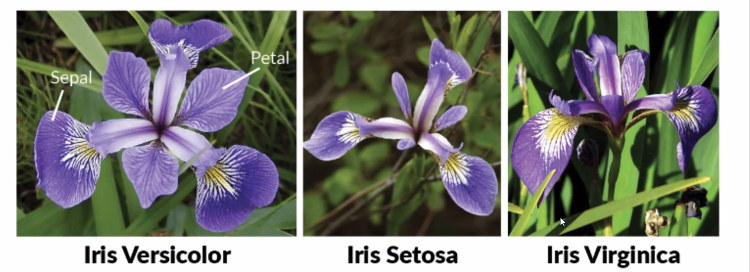

In [20]:
from sklearn.datasets import load_iris

In [31]:
mydic =load_iris()
print(mydic)
mydic.keys()  #딕셔너리의 키들을 보려면 keys

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [22]:
mydic['data'][:5] #데이터는 키를 뽑는다

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [23]:
mydic['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
mydic['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
mydic['feature_names'] 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [29]:
df = pd.DataFrame(data=mydic.data, columns=mydic.feature_names)
df['target'] = mydic.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [37]:
print(mydic['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========